In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
df=pd.read_csv("/content/tested.csv")

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
df.shape

(418, 12)

Handling the missing values

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
df.drop(['PassengerId','Name','Cabin','Ticket'],inplace=True,axis=1)

In [89]:
df.shape

(418, 8)

In [125]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


In [91]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [92]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [93]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<ipython-input-94-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

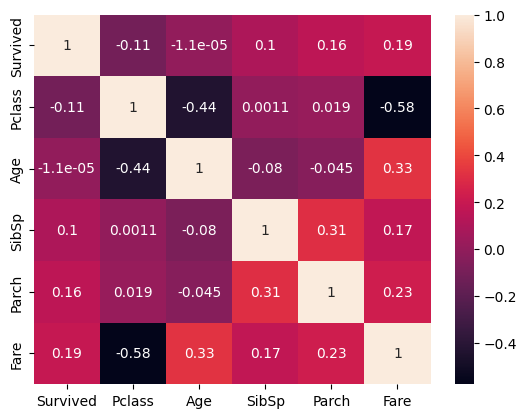

In [94]:
sns.heatmap(df.corr(),annot=True)

In [95]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [96]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Converting categorical variables**

In [97]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [98]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [99]:
df.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [100]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [101]:
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [102]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [104]:
x_train.shape

(292, 7)

In [105]:
x_test.shape

(126, 7)

In [106]:
model=LogisticRegression()

In [107]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
prediction_x_train=model.predict(x_train)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [111]:
train_accuracy=accuracy_score(y_train,prediction_x_train)

In [112]:
train_accuracy

1.0

In [114]:
prediction_x_test=model.predict(x_test)
test_accuracy=accuracy_score(y_test,prediction_x_test)

In [118]:
print( "accuracy score of test data -",test_accuracy*100,"%")

accuracy score of test data - 100.0 %


In [117]:
confusion_matrix(y_test,prediction_x_test)

array([[78,  0],
       [ 0, 48]])

**As from the above confusion matrix it can be seen that there are 0 value for false negative and false positive and the accuracy score of the test dataset is also 1 so the model is 100% accurate**

Model using RandomForestClassifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


In [120]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
predict_x_test2=model.predict(x_test)

In [122]:
accuracy_score_test=accuracy_score(y_test,predict_x_test2)

In [123]:
print( "accuracy score of test data -",accuracy_score_test*100,"%")

accuracy score of test data - 100.0 %


Data Analysis


In [126]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


<Axes: xlabel='Survived', ylabel='count'>

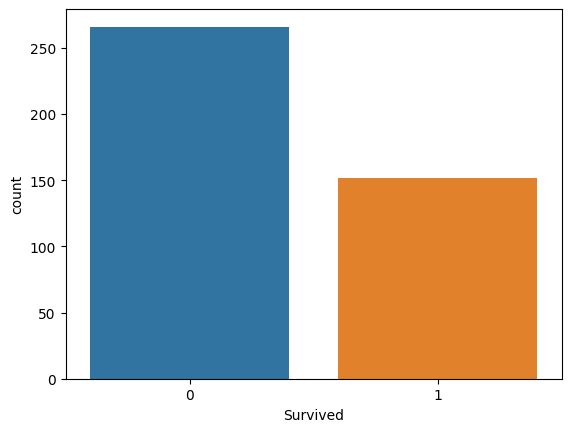

In [142]:
sns.countplot(x=df['Survived'])

From the above graph we can derive that maximum of the people did not survived


<Axes: xlabel='Survived', ylabel='count'>

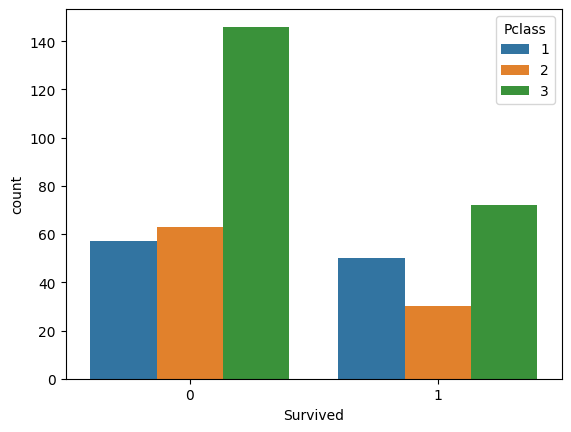

In [143]:
sns.countplot(x=df["Survived"],hue=df['Pclass'])

From the above graph we can derive that the passengers who were borded in the 3rd class were less survived in comparison to 1 and 2 class


<Axes: xlabel='SibSp', ylabel='count'>

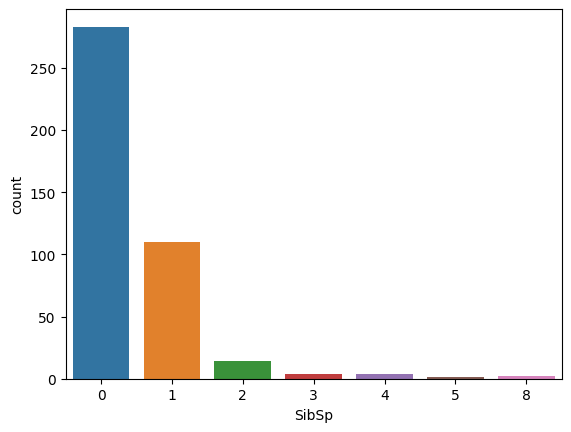

In [144]:
sns.countplot(x=df['SibSp'])

From the above graph it can be derived that maximum passengers were not sibling and spouse